# Numerisk løsning av likninger

```{admonition} Læringsutbytte
:class: utbytte, dropdown
I dette temaet arbeider vi med kompetansemålet:

 * utforske og forstå regneregler for potenser og logaritmer, og bruke ulike strategier for å løse eksponentialligninger og logaritmeligninger

Etter å ha arbeidet med temaet, skal du:
 
 * kunne forklare hva en numerisk metode er
 * undersøke ulike numeriske metoder for å løse likninger
 * lage et program som gir numerisk løsninger av likninger
 * forklare hvordan metoden fungerer
```

De aller fleste likninger vi møter i matematikken på skolen kan løses med en eller annen lur metode. Dette er nyttig for blant annet forståelse og utledning av vktige resultater. I det "virkelige liv" vil imidlertid mange (de fleste) av likningne vi møter enten være veldig vanskelig eller umulig å løse. Vi trenger allikevel metoder for å løse likningene. Til det trenger vi numeriske metoder.

## Numeriske metoder
Med en numerisk metode mener vi en metode der vi leter etter en tilnærmet løsning på likningen. Mange numeriske metoder kan utføre for hånd, men normalt sett involverer de mange utregninger og vil derfor enklest gjennomføres digitalt. Felles for de fleste metodene er at vi starter med en *gjetning* på hva løsningen vil være, og så prøver vi å forbedre gjetningen. Det vil derfor være en fordel dersom vi starter med en kvalifisert gjetning som er nærme løsningen. For å finne en slik kvalifisert gjetning hjelper det med en grafisk framstilling av likningen. Vi flytter derfor alt over til venstre side, tegner grafen og ser etter nullpunkt.

### Graftegning
La oss som eksempel ta likningen $4\ln(x^3-8)=x^2-20$. Vi flytter alt over på venstre side og kaller uttrykket $f(x)$ slik at vi skal løse likningen $f(x)=4\ln(x^3-8)-x^2+20=0$. 

For å tegne grafen til funksjonen, så må vi importere ekstra bibliotek inn i python. Vi har to muligheter:

 * numpy og matplotlib
 * pylab

Det første alternativet er det foretrukne i *skikkelig* programmering, mens pylab er et enklere alternativ som inkluderer alt vi trenger (på bekostning av litt problemer i større programmer). Vi gir først den *enkle* varianten før vi bruker den første i veien videre.

```{code-block}
from pylab import *

x = linspace(0,10,1000)             # x-verdier
y = 4*log(x**3 - 8) - x**2 + 20     # y-verdier

plot(x, y)
axhline(y = 0, color = "red")       # tegner x-akse
show()
```

Så tar vi tilsvarende kode med numpy og matplotlib. Eneste forskjellen er at vi må putte på np. og plt. før noen av kommandoene. Dette kan virke unødvendig i forhold til løsningen over. I større program er det imidlertid en stor fordel siden det tydeliggjør hvor vi henter funksjonene fra. Vi kan støte på at flere bibliotek inneholder funksjoner/kommandoer med samme navn. Da vil vi ikke vite hvilken versjon programmet vårt velger å bruke, og resultatet kan bli feil.

Videre vil vi kun bruke versjonen med numpy og matplotlib. Ønsker du å bruke den enkle versjonen vil endringen du må gjøre stort sett bestå i at du skriver inn riktig import i starten og at du fjerner np. og plt. alle steder i programmene.

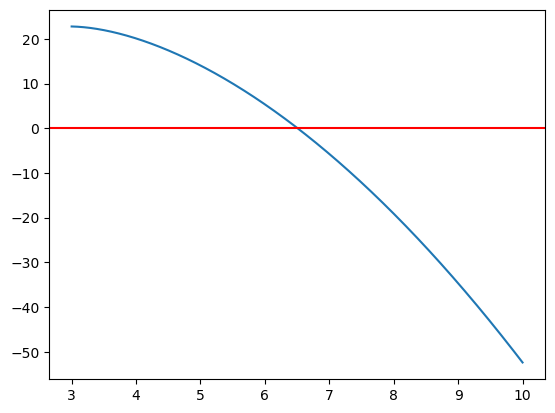

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(3,10,1000)              # x-verdier
y = 4*np.log(x**3 - 8) - x**2 + 20      # y-verdier

plt.plot(x, y)
plt.axhline(y = 0, color = "red")       # tegner x-akse
plt.show()

Fra grafen over ser vi at nullpunktet vårt (som er løsningen av likningen) må ligge ved omtrent $x=6.5$. Vi kan nå gå videre til å se på algoritmer/metoder som kan finne dette nullpunktet for oss.

### Første metode
Den første metoden vi skal prøve er en metode som i liten grad brukes da den i større sammenhenger er langsom og kan feile. Imidlertid så er den ganske lett å forstå og er en fin intrduksjon til numeris løsning av likninger.

Metoden går ut på at vi starter med en $x$-verdi som er mindre enn løsningen vi vil finne. Vi regner ut funksjonsverdien $f(x)$. Så øker vi $x$ litt og regner ut ny funksjonsverdi. Slik fortsetter vi til $f(x)$ skifter fortegn. Da vil nullpunktet ligge mellom de to siste $x$-verdiene, siden funksjonen har krysset $x$-aksen. Først gir vi en pseudokode for metoden.

```{code-block} text
x = startverdi
y = f(x)
dx = steglengde

mens f(x)*f(x_forrige) > 0: # Når dette produktet blir negativt skifter funksjonen fortegn
    x_forrige = x
    x = x + dx

nullpunkt = (x+x_forrige)/2
skriv ut nullpunkt
```

Vi prøver å implementere metoden.

In [6]:
import numpy as np  # Trengs ikke gjøres på nytt dersom dette er i samme
                    # program som grafen over

x_start = 5         # Startpunkt
dx = 1E-6           # Forskjellen mellom x-verdier 1*10^-6

# Definerer funksjonen
def f(x):
    return 4*np.log(x**3 - 8) - x**2 + 20

x_1 = x_start                   # Velger første x-verdi
x_2 = x_1 + dx                  # Velger andre x-verdi

while f(x_1)*f(x_2) > 0:      
    x_1 = x_2
    x_2 = x_2 + dx
    
x = (x_1 + x_2) / 2      # Finner midtpunktet de to siste x-verdiene

print("Løsningen av likningen er x = ", x)

Løsningen av likningen er x =  6.508405500210841


Programmet over kan brukes til å finne nullpunkt til de aller fleste funksjoner. Tenk gjerne over om det er noen spesielle typer nullpunkt programmet ikke kan finne. 

### Halveringsmetoden
Vi skal nå vise en metode som i de fleste tilfeller vil være raskere og bedre enn metoden over. Den kalles halveringsmetoden. I korte trekk går metoden ut på at vi velger oss et intervall $[a, b]$ rundt nullpunktet. Så finner vi midten av intervallet og kaller det $m$. Siste steg er at vi ved hjelp av fortegnene til funksjonsverdiene undersøker om nullpunktet ligger i $[a, m]$ eller $[m, b]$. Dette blir det nye intervallet vårt og så gjentar vi metoden fram til intervallet er *lite nok*. Da vil en god tilnærmingsverdi for løsningen være midtpunktet i dette intervallet.

Nullpunktet er ved x =  6.508405747823417


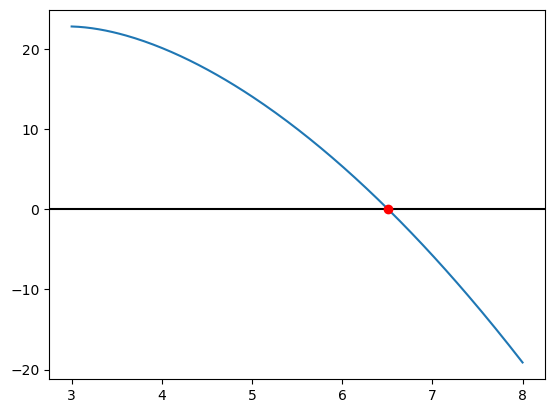

In [15]:
import numpy as np

# Definerer funksjonen
def f(x):
    return 4*np.log(x**3 - 8) - x**2 + 20

a = 6                               # Startverdi for intervallet
b = 7                               # Sluttverdi for intervallet
noyaktighet = 1E-8

m = (a+b)/2                         # Finner midtpunktet
while np.abs(f(m)) >= noyaktighet:  # Sjekker om f(m) er nærme nok 0
    if f(a)*f(m) > 0:               # Dersom a og m har samme fortegn, så lar vi ny verdi av a være m.
        a = m                       
    else:
        b = m                       # Ellers lar vi ny verdi av b være m
    m = (a+b)/2                     # Finner nytt midtpunkt
        
print("Nullpunktet er ved x = ", m)

x = np.linspace(3, 8, 200)
plt.plot(x, f(x))                                           # Tegner grafen til funksjonen
plt.axhline(y = 0, color = "black")                         # Tegner x-aksen
plt.plot(m, f(m), marker='o', color='red')                  # Tegner inn nullpunktet
plt.show()

For vårt formål vil begge metodene over stort sett fungere bra nok. For større oppgaver der det skal løses mange likninger trengs det mer avanserte metoder som vi ikke går inn på her.

For en mer utførlig introduksjon til numeriske løsning av likninger anbefales siden [realprog.no](https://realprog.no/docs/tema4_numeriske_metoder/likninger.html).

### Prøv selv
Lag eller finn ei likning som du vil løse. Prøv å lage egen kode for å tegne grafen og for å løse likningen med en av metodene over. Bruk enten editoren under eller i eget program på datamaskinen din.

<iframe src="https://trinket.io/embed/python3/efb8d17aa7" width="100%" height="356" frameborder="0" marginwidth="0" marginheight="0" allowfullscreen></iframe>